In [1]:
import numpy as np
from sklearn.datasets import load_boston
boston=load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:100,:],columns=boston.feature_names)
y=boston.target[:100]
#データを100個に限っているのは後でグラフをプロットしたときの様子を見やすくするためです。

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
x=X['LSTAT'].values

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

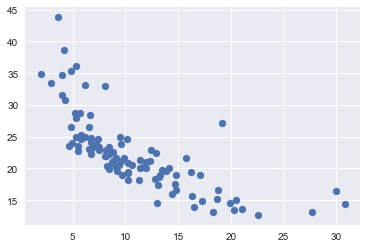

In [5]:
plt.scatter(x,y)

# Single regression

In [6]:
from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()

In [7]:
print(y)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2]


In [8]:
lin_1d.fit(x[:,None],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
x.ndim

1

In [10]:
x[:,None].ndim

2

In [11]:
lin_1d.predict(2)
lin_1d.predict(10)

array([ 22.90694453])

[]

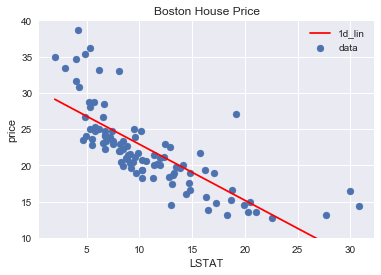

In [12]:
#First,we prepare data for plotting.
n=np.linspace(np.min(x),np.max(x),1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#In order to make the graph easier to see, I just narrowed down the plot range on the y axis.
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [13]:
lin_1d.predict(25)

array([ 11.30238006])

# Multinominal regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
degree_2=PolynomialFeatures(degree=2)

In [15]:
x_2=degree_2.fit_transform(x[:,None])

## The next command is representing that learning to supervised data assigned to (x_2,y).

In [16]:
lin_2d=LinearRegression()
lin_2d.fit(x_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

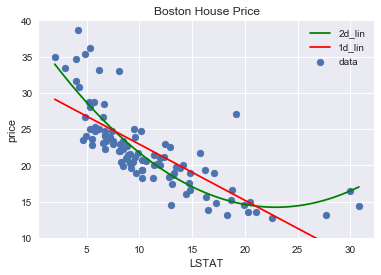

In [17]:
#First,we prepare data for plotting.
n=np.linspace(np.min(x),np.max(x),1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

#Then,let's output the result of learning.
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#In order to make the graph easier to see, I just narrowed down the plot range on the y axis.
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

### Following command is representing that checking sqared error, that is, we compare the performance of which linear function and quadratic function.

In [18]:
from sklearn.metrics import mean_squared_error
#first,let's look at the sqared error of the linear function.
mean_squared_error(y,lin_1d.predict(x[:,None]))

15.537906007479371

In [19]:
#next,let's look at the sqared error of the quadratic function.
mean_squared_error(y,lin_2d.predict(x_2))

10.920226905348915

# Following is the code that fit cubic function & quartic function.

In [20]:
degree_3=PolynomialFeatures(degree=3)
degree_4=PolynomialFeatures(degree=4)
x_3=degree_3.fit_transform(x[:,None])
x_4=degree_4.fit_transform(x[:,None])

In [21]:
lin_3d=LinearRegression()
lin_4d=LinearRegression()

lin_3d.fit(x_3,y)
lin_4d.fit(x_4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

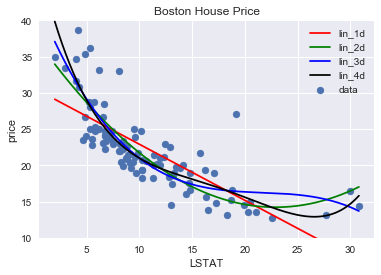

In [22]:
#First,we prepare data for plotting.
n=np.linspace(np.min(x),np.max(x),1000)
y_1d_fit=lin_1d.predict(n[:,None])
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,None]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,None]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,None]))

#Then,let's output the result of learning.
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='lin_1d')
plt.plot(n,y_2d_fit,'g',label='lin_2d')
plt.plot(n,y_3d_fit,'b',label='lin_3d')
plt.plot(n,y_4d_fit,'k',label='lin_4d')
plt.ylim(10,40)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot()

In [27]:
#mean_squared_error(y,lin_1d.predict(x[:,None]))#15.537
#mean_squared_error(y,lin_2d.predict(x_2))#10.920
#mean_squared_error(y,lin_3d.predict(x_3))#10.055
mean_squared_error(y,lin_4d.predict(x_4))#9.617

9.617390715416672

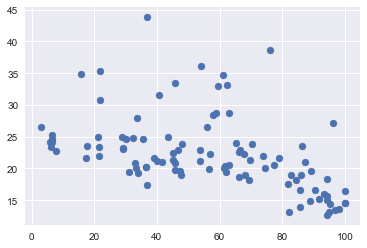

In [29]:
x=X['AGE'].values
plt.scatter(x,y)

In [33]:
degree_2=PolynomialFeatures(degree=2)
degree_3=PolynomialFeatures(degree=3)
degree_4=PolynomialFeatures(degree=4)

x_2=degree_2.fit_transform(x[:,None])
x_3=degree_3.fit_transform(x[:,None])
x_4=degree_4.fit_transform(x[:,None])

In [34]:
lin_1d=LinearRegression()
lin_2d=LinearRegression()
lin_3d=LinearRegression()
lin_4d=LinearRegression()

lin_1d.fit(x[:,None],y)
lin_2d.fit(x_2,y)
lin_3d.fit(x_3,y)
lin_4d.fit(x_4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[]

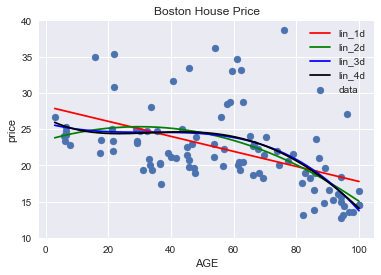

In [37]:
n=np.linspace(np.min(x),np.max(x),1000)
y_1d_fit=lin_1d.predict(n[:,None])
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,None]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,None]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,None]))

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='lin_1d')
plt.plot(n,y_2d_fit,'g',label='lin_2d')
plt.plot(n,y_3d_fit,'b',label='lin_3d')
plt.plot(n,y_4d_fit,'k',label='lin_4d')
plt.ylim(10,40)
plt.xlabel("AGE")
plt.ylabel("price")
plt.legend()
plt.plot()

In [42]:
#mean_squared_error(y,lin_1d.predict(x[:,None]))#26.754
#mean_squared_error(y,lin_2d.predict(x_2))#24.397
#mean_squared_error(y,lin_3d.predict(x_3))#23.978
mean_squared_error(y,lin_4d.predict(x_4))#23.956

23.95681697681929